# Export Plot to SVG, PDF, HTML, PNG

- [Export Using `ggsave()`](#Export-Using-ggsave())

  - [Export SVG to File](#Export-SVG-to-File)

  - [Export PDF to File](#Export-PDF-to-File)

  - [Export HTML to File](#Export-HTML-to-File)

  - [Export to PNG File](#Export-to-PNG-File)

- [Export Plot to a File or File-Like Object](#Export-Plot-to-a-File-or-File-Like-Object)

  - [Saving to a File](#Saving-to-a-File)

  - [Wrighting to a Stream of In-Memory Bytes](#Wrighting-to-a-Stream-of-In-Memory-Bytes)

- [Adjusting the Size and Aspect Ratio](#Adjusting-the-Size-and-Aspect-Ratio)

  - [Parameter `scale`](#Parameter-scale)

  - [Parameters `w`, `h`, `unit` and `dpi`](#Parameters-w,-h,-unit-and-dpi)

    - [Parameters `w` and `h`](#Parameters-w-and-h)

    - [72 dpi](#72-dpi)

    - [300 dpi](#300-dpi)

In [1]:
import io

import numpy as np
import pandas as pd

from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
p = ggplot(df) + geom_point(aes("petal_length", "petal_width", color="species"), size=5) + ggsize(600, 400)
p

## Export Using `ggsave()`

The `ggsave()` function is an easy way to export plot to a file in SVG, PDF, HTML or PNG formats.

### Export SVG to File

In [5]:
fullpath_svg = ggsave(p, "plot.svg")

Load and display saved SVG.

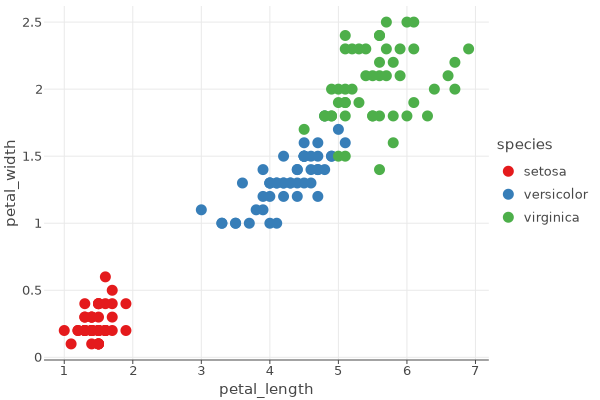

In [6]:
from IPython.display import SVG

SVG(filename=fullpath_svg)

### Export PDF to File

In [7]:
fullpath_pdf = ggsave(p, "plot.pdf")

Load and display saved PDF.

In [8]:
from os import getcwd
from IPython.display import IFrame

IFrame(fullpath_pdf.replace(getcwd(), "."), width=600, height=400)

### Export HTML to File

By default, when exporting HTML, `ggsave` wraps the HTML of the plot in an `iframe` that matches the size of the plot.

In [9]:
fullpath_html = ggsave(p, "plot.html")

Load and display saved HTML.

In [10]:
from IPython.display import HTML

HTML(filename=fullpath_html)

Use the `iframe=False` option to only export the HTML of the plot, without adding an `iframe`.

In [11]:
fullpath_no_iframe = ggsave(p, "no_iframe_plot.html", iframe=False)

In [12]:
HTML(filename=fullpath_no_iframe)

### Export to PNG File

To save plot as a PNG file use a filename that have "png" extension. 

In [13]:
fullpath_png = ggsave(p, "plot.png")

Load and display saved PNG.

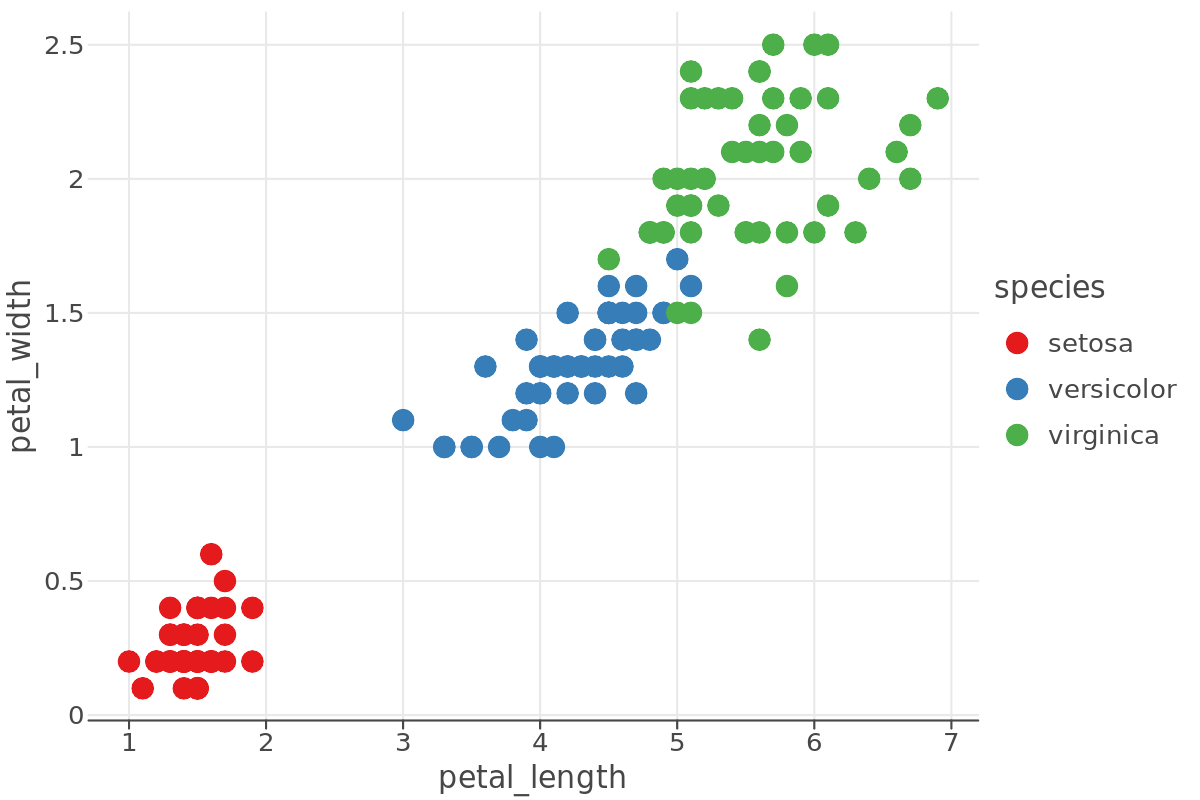

In [14]:
from IPython.display import Image

Image(filename=fullpath_png, width=600, height=400)

## Export Plot to a File or File-Like Object

You can export figure created by `ggplot()` or `gggrid()` functions <br>
to a vector or raster format using the following methods: 
- `to_svg(path)`
- `to_html(path, iframe)`
- `to_png(path, scale)`
- `to_pdf(path, scale)`

To save plot to a file on disc, specify the file' pathname in `path`. <br>
To stream plot image to a file-like object, supply such object in the `path` parameter instead of a pathname.

### Saving to a File

In [15]:
path = p.to_svg("lets-plot-images/to_svg_plot.svg")

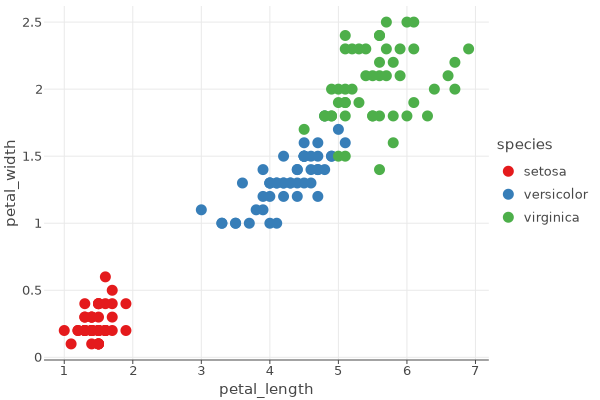

In [16]:
SVG(path)

### Wrighting to a Stream of In-Memory Bytes

In [17]:
stream = io.BytesIO()

p.to_svg(stream)

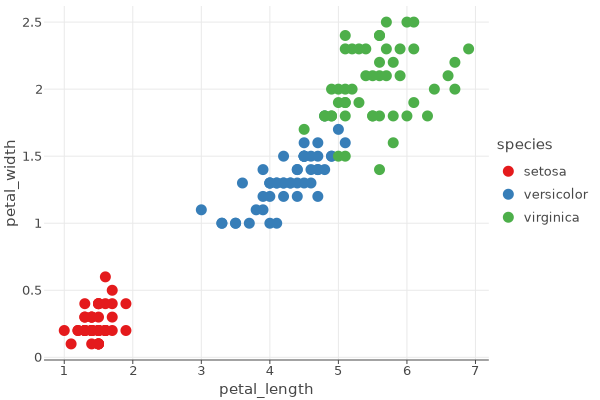

In [18]:
SVG(stream.getvalue())

## Adjusting the Size and Aspect Ratio

### Parameter `scale`

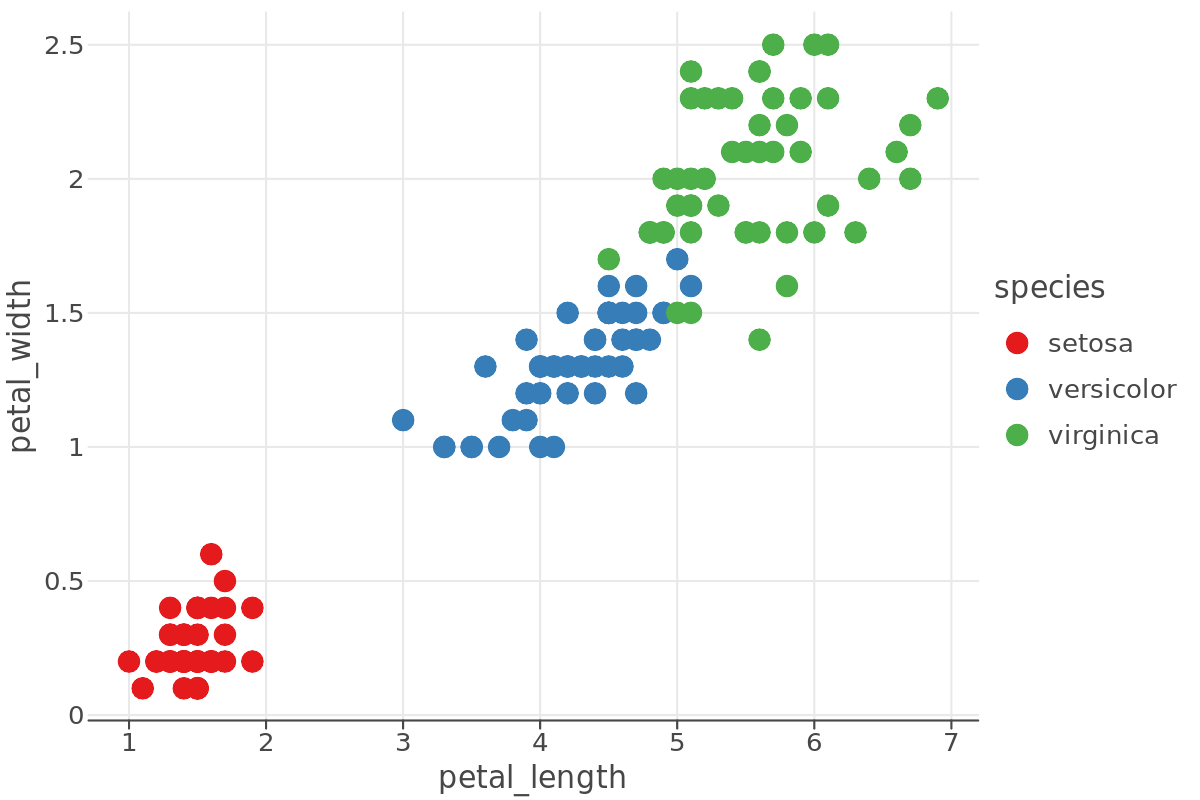

In [19]:
# default scale is 2.0
img_scale_default = ggsave(p, "scale_default_plot.png")
Image(filename=img_scale_default)

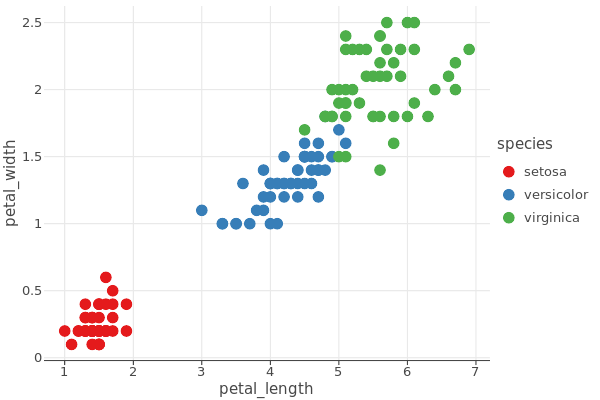

In [20]:
# use custom scale
img_scale_1 = ggsave(p, "scale_1_plot.png", scale=1)
Image(filename=img_scale_1)

### Parameters `w`, `h`, `unit` and `dpi`

These parameters allow you to configure the export of your plot:

- `w` and `h`: Define the width and height of the output image in the specified unit.
- `unit`: Specifies the unit of measurement (`'in'`, `'cm'`, `'mm'` or `'px'`).
- `dpi`: Sets the resolution in dots per inch.

This is how they work for PNG and PDF formats:

- If `w`, `h`, `unit` and `dpi` are all specified:
  - The plot's pixel size (default or set by `ggsize()`) is ignored.
  - The output size is calculated using the specified `w`, `h`, `unit` and `dpi`.
    - The plot is resized to fit the specified `w` x `h` area, which may affect the layout, tick labels and other elements.
- If only `dpi` is specified:
  - The plot's pixel size (default or set by `ggsize()`) is converted to inches using the standard display PPI of 96.
  - The output size is then calculated based on the specified DPI.
    - The plot maintains its aspect ratio, preserving layout, tick labels and other visual elements.
    - Useful for printing - the plot will appear nearly the same size as on screen.
- If `w`, `h` are not specified:
  - The `scale` parameter is used to determine the output size.
    - The plot maintains its aspect ratio, preserving layout, tick labels and other visual elements.
    - Useful for generating high-resolution images suitable for publication.

For SVG format:

- If `w`, `h` and `unit` are specified:
  - The plot's pixel size (default or set by `ggsize()`) is ignored.
  - The output size is calculated using the specified `w`, `h` and `unit`.

#### Parameters `w` and `h`

The `w` and `h` parameters override plot size, allowing to specify the output image size independently of the plot size.

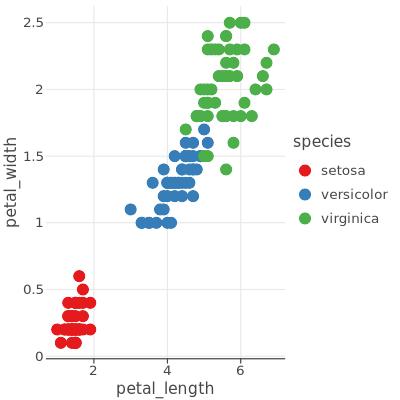

In [21]:
img_square = ggsave(p, "square_plot.png", w=4, h=4, unit='in', dpi=100)
Image(filename=img_square)

#### 72 dpi

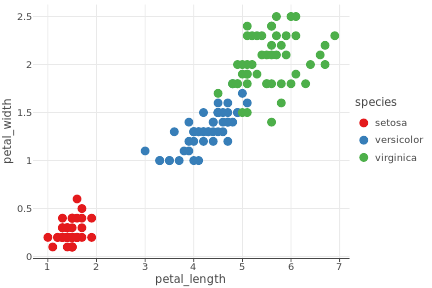

In [22]:
img_72 = ggsave(p, "72dpi_plot.png", w=6, h=4, unit='in', dpi=72)
Image(filename=img_72, width=900, height=600)

#### 300 dpi

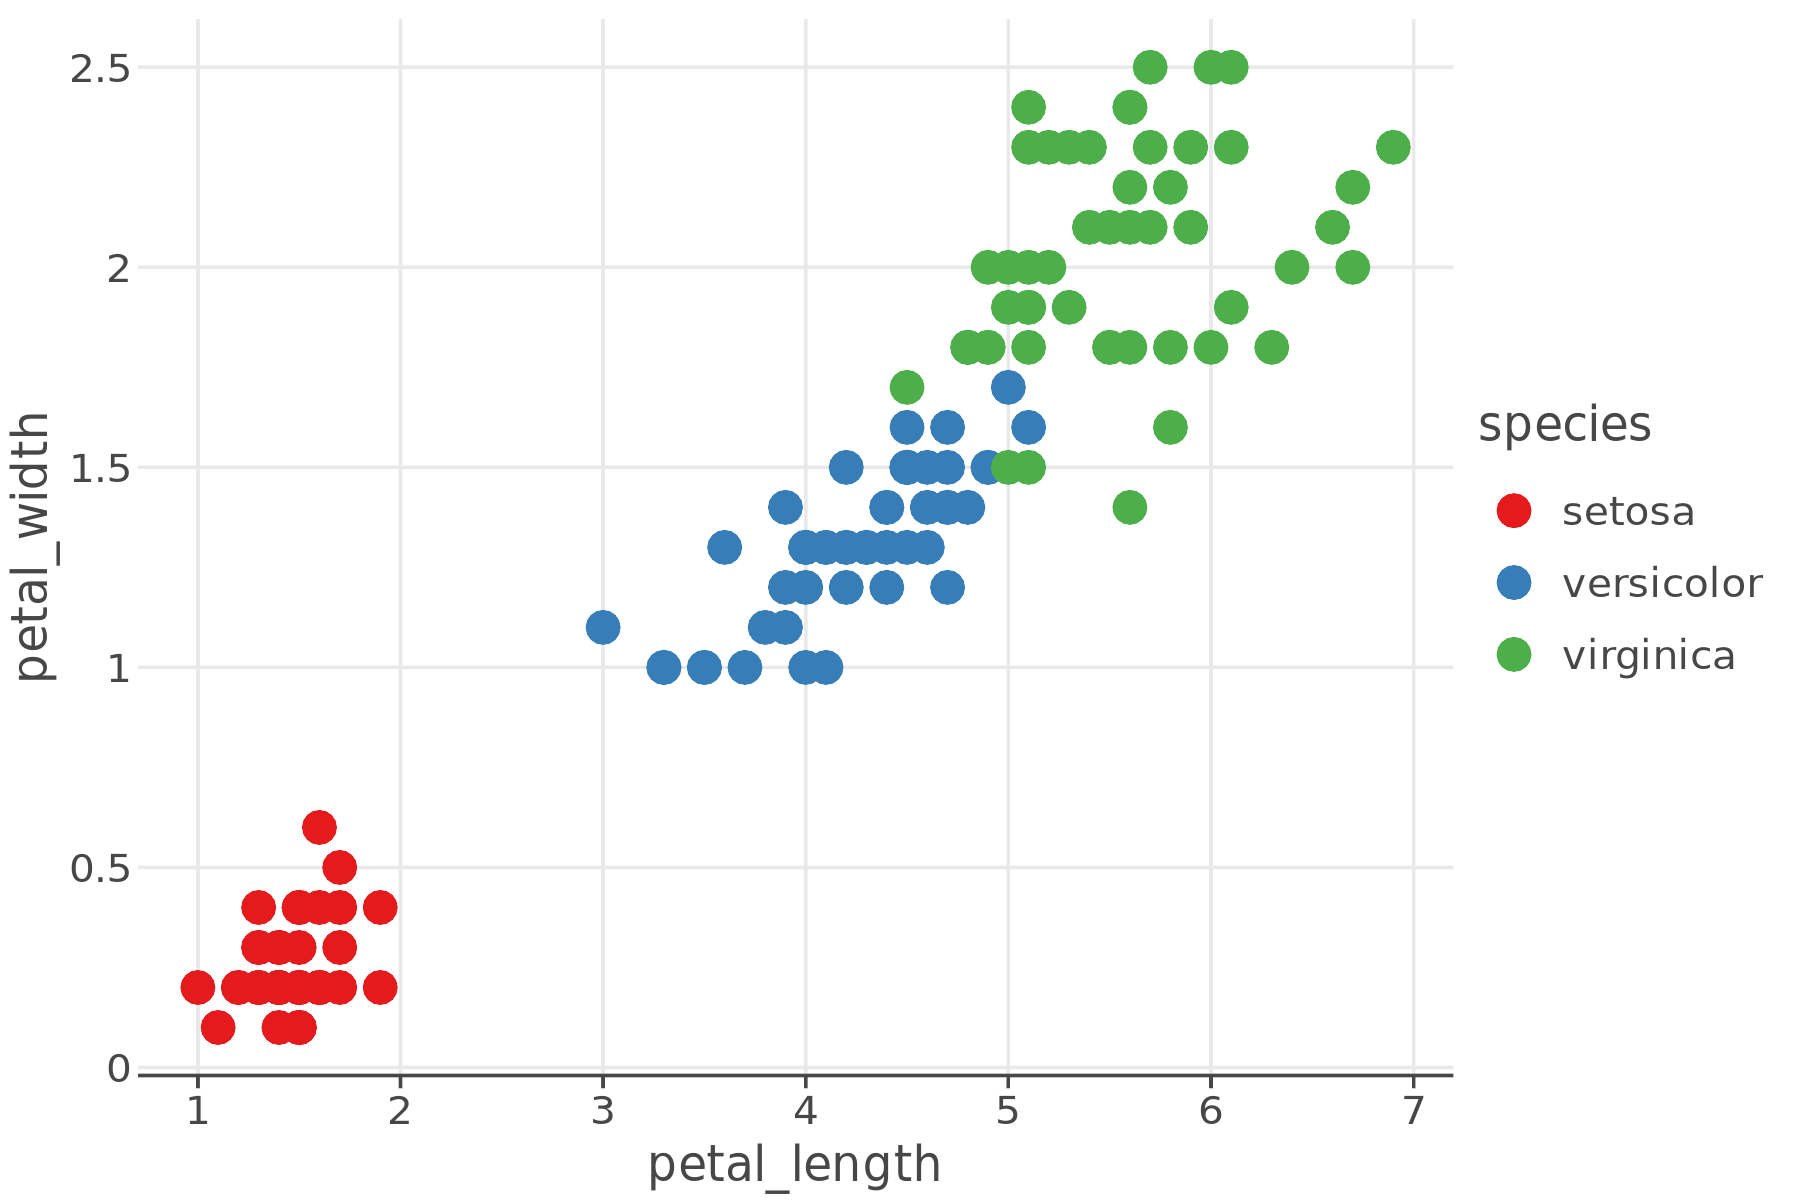

In [23]:
img_300 = ggsave(p, "300dpi_plot.png", w=6, h=4, unit='in', dpi=300)
Image(filename=img_300, width=900, height=600)